# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [1]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

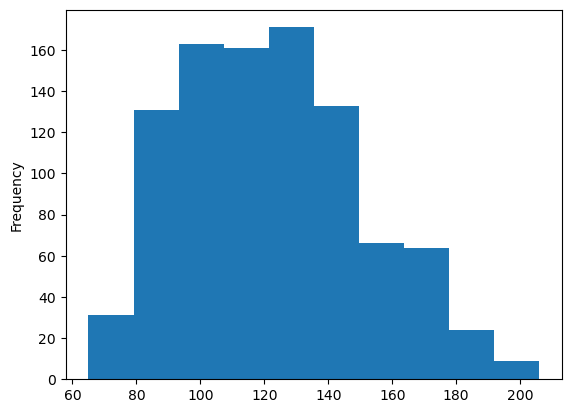

In [2]:
df['bpm'].plot(kind='hist')

In [4]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.5 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 53.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.4 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 63.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [matplotlib]1 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


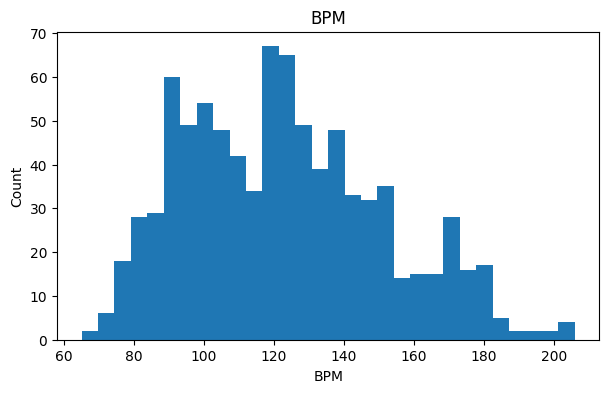

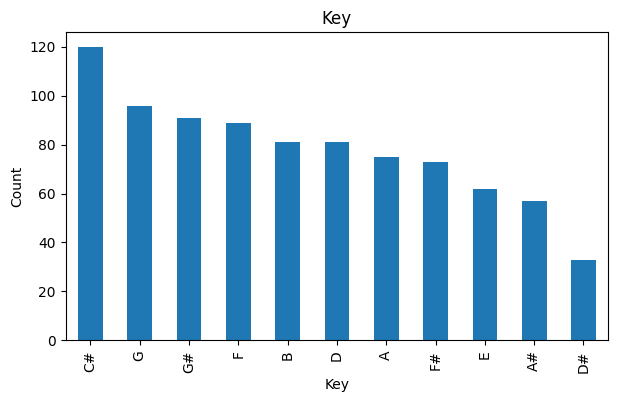

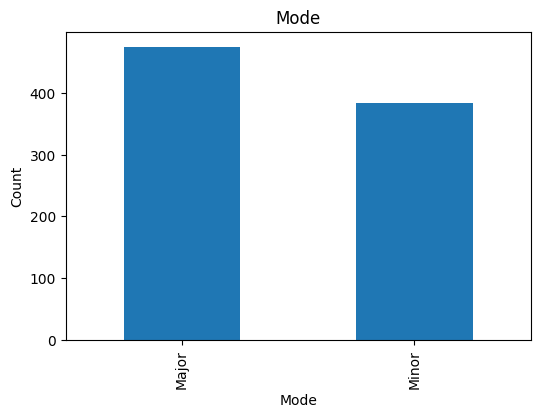

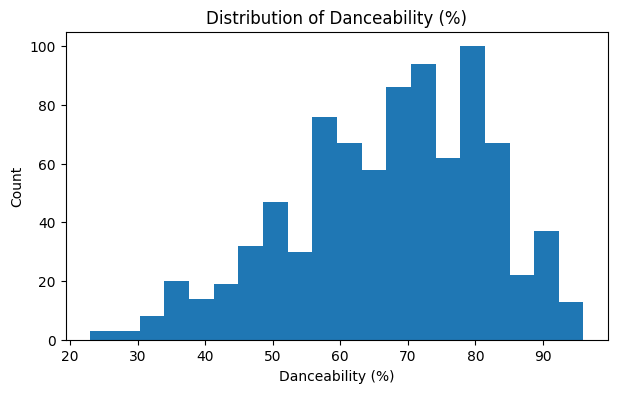

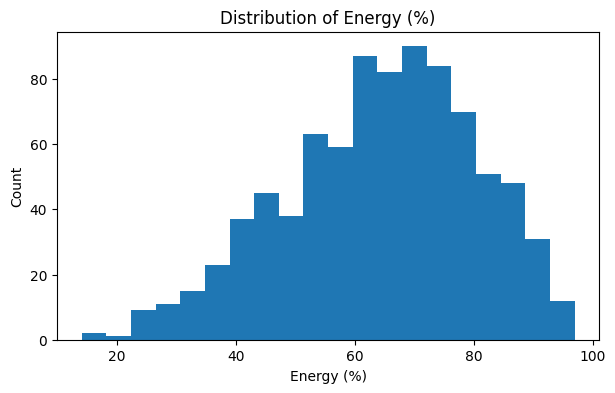

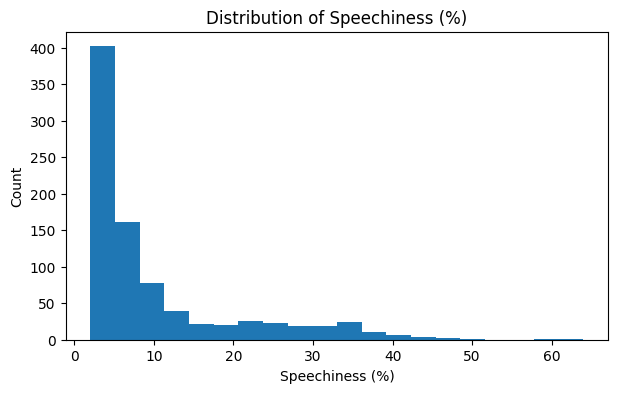

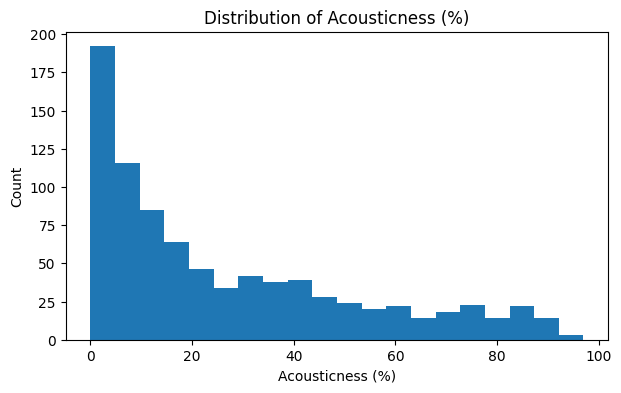

In [2]:
%pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')


col_map = {}
for c in df.columns:
    lc = c.lower().strip()
    if lc == 'artist(s)_name': col_map[c] = 'artist'
    if lc == 'track_name':     col_map[c] = 'track'
    if lc == 'danceability_%': col_map[c] = 'danceability'
    if lc == 'energy_%':       col_map[c] = 'energy'
    if lc == 'speechiness_%':  col_map[c] = 'speechiness'
    if lc == 'acousticness_%': col_map[c] = 'acousticness'
    if lc == 'streams':        col_map[c] = 'streams'
df = df.rename(columns=col_map)


num_cols = ['bpm','danceability','energy','speechiness','acousticness','streams']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')


need = ['track','artist','bpm','key','mode','danceability','energy','speechiness','acousticness','streams']
dfc = df.dropna(subset=['bpm','key','mode','danceability','energy','speechiness','acousticness'])[need]


plt.figure(figsize=(7,4)); plt.hist(dfc['bpm'], bins=30); plt.title('BPM'); plt.xlabel('BPM'); plt.ylabel('Count'); plt.show()
plt.figure(figsize=(7,4)); dfc['key'].value_counts().sort_values(ascending=False).plot(kind='bar'); plt.title('Key'); plt.xlabel('Key'); plt.ylabel('Count'); plt.show()
plt.figure(figsize=(6,4)); dfc['mode'].value_counts().sort_values(ascending=False).plot(kind='bar'); plt.title('Mode'); plt.xlabel('Mode'); plt.ylabel('Count'); plt.show()

for col,label in [('danceability','Danceability (%)'),
                  ('energy','Energy (%)'),
                  ('speechiness','Speechiness (%)'),
                  ('acousticness','Acousticness (%)')]:
    plt.figure(figsize=(7,4))
    plt.hist(dfc[col], bins=20)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label); plt.ylabel('Count')
    plt.show()

In [4]:
def iqr(series):
    q1,q2,q3 = np.nanpercentile(series.dropna(), [25,50,75])
    return q1,q2,q3

bpm_q1, bpm_med, bpm_q3       = iqr(dfc['bpm'])
dan_q1, dan_med, dan_q3       = iqr(dfc['danceability'])
ene_q1, ene_med, ene_q3       = iqr(dfc['energy'])
spc_q1, spc_med, spc_q3       = iqr(dfc['speechiness'])
aco_q1, aco_med, aco_q3       = iqr(dfc['acousticness'])

top_key  = dfc['key'].mode().iat[0]
top_mode = dfc['mode'].mode().iat[0]

summary = pd.DataFrame({
    'metric': ['BPM','Danceability %','Energy %','Speechiness %','Acousticness %'],
    'Q1':     [bpm_q1, dan_q1, ene_q1, spc_q1, aco_q1],
    'Median': [bpm_med, dan_med, ene_med, spc_med, aco_med],
    'Q3':     [bpm_q3, dan_q3, ene_q3, spc_q3, aco_q3],
}).set_index('metric').round(2)

print("Most common key:", top_key)
print("Most common mode:", top_mode)
print("\nIQR summary:\n", summary, "\n")

Most common key: C#
Most common mode: Major

IQR summary:
                     Q1  Median      Q3
metric                                
BPM             100.00   121.0  141.75
Danceability %   57.00    70.0   78.00
Energy %         53.25    66.0   76.00
Speechiness %     4.00     6.0   12.00
Acousticness %    5.00    17.0   42.00 



In [8]:
bpm_q3_rounded = np.ceil(bpm_q3)
profile = {
    'bpm_min': bpm_q1, 'bpm_max': bpm_q3_rounded,
    'dance_min': dan_q1, 'dance_max': dan_q3,
    'energy_min': ene_q1, 'energy_max': ene_q3,
    'speech_min': spc_q1, 'speech_max': spc_q3,
    'acoustic_min': aco_q1, 'acoustic_max': aco_q3,
    'key': top_key,
    'mode': top_mode,
}

mask = (
    (dfc['bpm'].between(profile['bpm_min'], profile['bpm_max'])) &
    (dfc['danceability'].between(profile['dance_min'], profile['dance_max'])) &
    (dfc['energy'].between(profile['energy_min'], profile['energy_max'])) &
    (dfc['speechiness'].between(profile['speech_min'], profile['speech_max'])) &
    (dfc['acousticness'].between(profile['acoustic_min'], profile['acoustic_max'])) &
    (dfc['key'] == profile['key']) &
    (dfc['mode'] == profile['mode'])
)

matches = dfc.loc[mask, ['track','artist','bpm','key','mode',
                          'danceability','energy','speechiness','acousticness','streams']].copy()
matches = matches.sort_values('streams', ascending=False).reset_index(drop=True)

print(f"Matches found: {len(matches)}")
print(matches.head(20).to_string(index=False))

Matches found: 2
             track    artist  bpm key  mode  danceability  energy  speechiness  acousticness      streams
      Need To Know  Doja Cat  130  C# Major            66      61            7            30 1042568408.0
Ginseng Strip 2002 Yung Lean  115  C# Major            60      71            4             8  240769997.0


In [9]:
## Key: C#

## Mode: Major

## BPM: 100–142 (rounded from 141.75)

## Danceability: 57–78%

## Energy: 53–76%

## Speechiness: 4–12%

## Acousticness: 5–42%

In [ ]:
## “Need To Know” — Doja Cat Streams: 1,042,568,408 (Very Very popular)
## “Ginseng Strip 2002” — Yung Lean Streams: 240,770,000 (Very popular)

In [ ]:
##“Need To Know” by Doja Cat
## BPM	130	
##Key:  C#
##Mode: Major	
##Danceability: 66%	
##Energy: 61%	
##Speechiness: 7%
##Acousticness: 30%

##Fits the ranges perfectly!!